In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#reading 10 rows of the file
df=pd.read_csv("SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
#check if there is any null values of not
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#getting the dadta types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [25]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [26]:
df.shape

(9994, 13)

In [27]:
df[['Sales', 'Quantity']].describe()

,Sales,Quantity
count,9994.000000,9994.000000
mean,229.857901,3.789574
std,623.245124,2.225110
min,0.444000,1.000000
25%,17.280000,2.000000
50%,54.490000,3.000000
75%,209.940000,5.000000
max,22638.480000,14.000000


In [28]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#finding duplicate values
df.duplicated().sum()

17

In [12]:
#deleting duplicate entries
df.drop_duplicates(inplace=True)

In [16]:
#identifying garbage values
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("****"*10)

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64
****************************************
Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64
****************************************
Country
United States    9977
Name: count, dtype: int64
****************************************
City
New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64
****************************************
State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan               

# eda

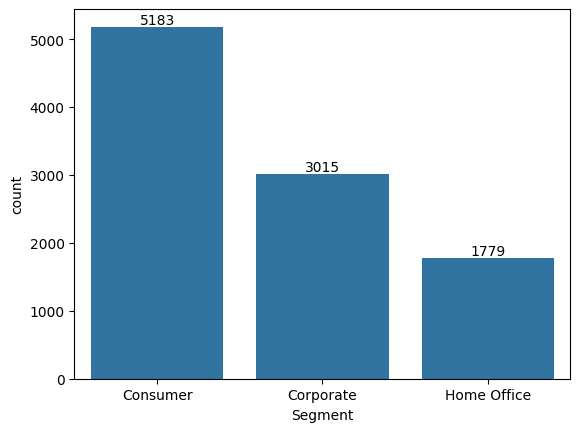

In [17]:
#checkin how many buyers from each segment
ax=sns.countplot(x='Segment',data=df)
#for displaying the values in the graph
for bars in ax.containers:
    ax.bar_label(bars)

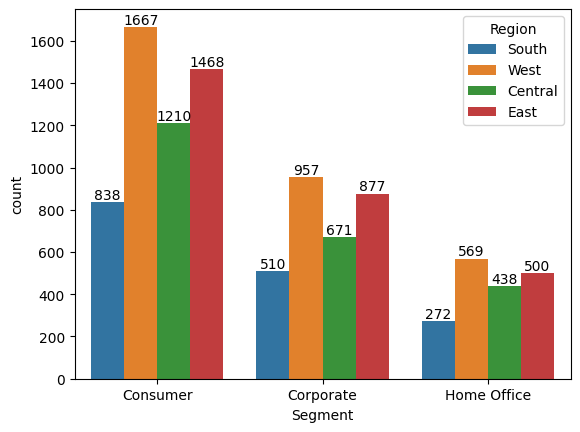

In [18]:
#chceking how many customers we have region vise
a=sns.countplot(x='Segment',data=df ,hue='Region')
for i in a.containers:
    a.bar_label(i)

In [38]:
df.groupby(['Segment'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)

,Segment,Profit
0,Consumer,134116.2384
1,Corporate,91979.1340
2,Home Office,60298.6785


<Axes: xlabel='Segment', ylabel='Profit'>

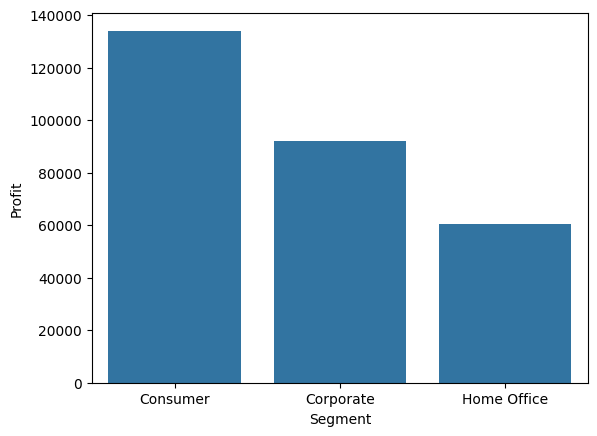

In [19]:
#counting total profit from each segment
gr=df.groupby(['Segment'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
sns.barplot(x='Segment',y='Profit',data=gr)

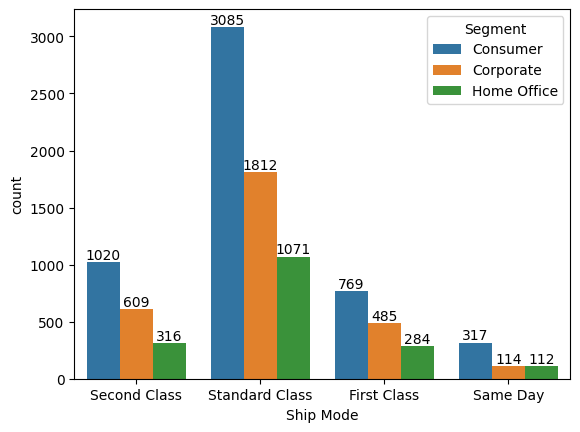

In [51]:
#which segment consumers use which ship mode
a=sns.countplot(x='Ship Mode',data=df ,hue='Segment')
for i in a.containers:
    a.bar_label(i)

<Axes: xlabel='Ship Mode', ylabel='count'>

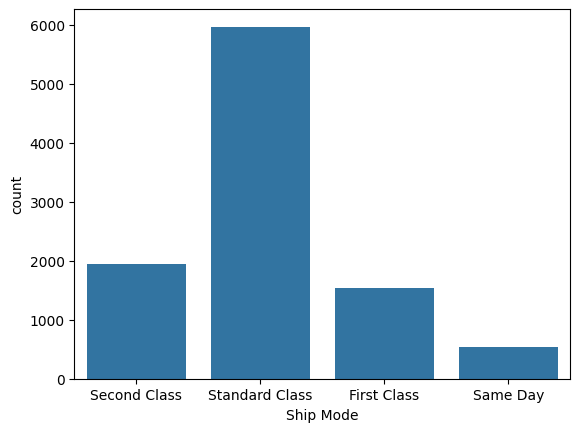

In [53]:
sns.countplot(x='Ship Mode',data=df)

<Axes: xlabel='Country', ylabel='count'>

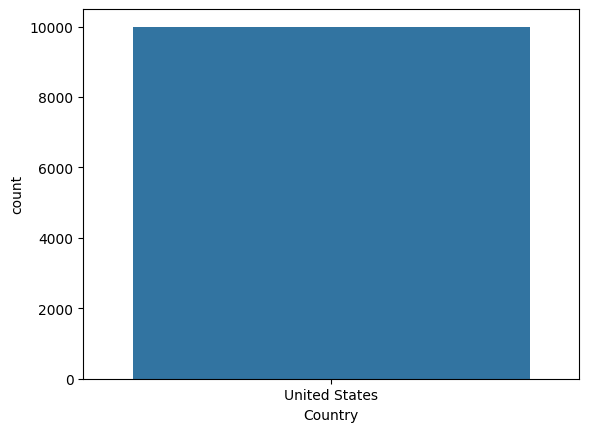

In [55]:
sns.countplot(x='Country',data=df)

<Axes: xlabel='Category', ylabel='count'>

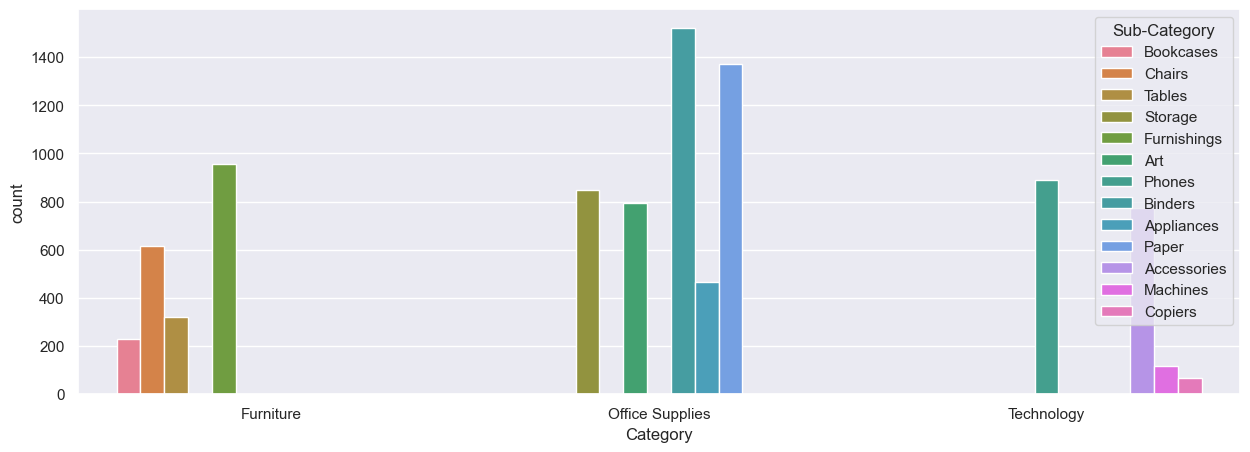

In [66]:
category_sub_category_counts = df.groupby(['Category', 'Sub-Category']).size().reset_index(name='counts')

# Step 2: Identify the top 5 subcategories within each category
top_5_sub_categories_per_category = category_sub_category_counts.groupby('Category').apply(
    lambda x: x.nlargest(5, 'counts')
).reset_index(drop=True)

# Step 3: Filter the original DataFrame to include only the top 5 subcategories within each category
filtered_df = df[df.set_index(['Category', 'Sub-Category']).index.isin(
    top_5_sub_categories_per_category.set_index(['Category', 'Sub-Category']).index
)]

# Step 4: Set the figure size and create the count plot
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x='Category', data=filtered_df, hue='Sub-Category')

<Axes: xlabel='Sub-Category', ylabel='count'>

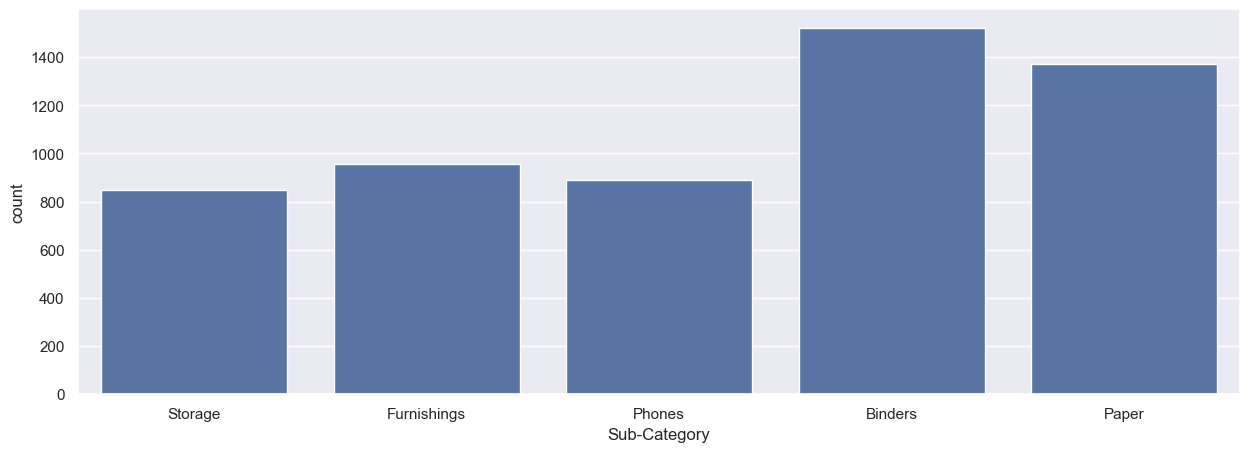

In [67]:
sub_category_counts = df['Sub-Category'].value_counts()

# Step 2: Identify the top 5 subcategories
top_5_sub_categories = sub_category_counts.nlargest(5).index

# Step 3: Filter the DataFrame to include only the top 5 subcategories
filtered_df = df[df['Sub-Category'].isin(top_5_sub_categories)]

# Step 4: Set the figure size and create the count plot
#sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='Sub-Category', data=filtered_df)

In [54]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

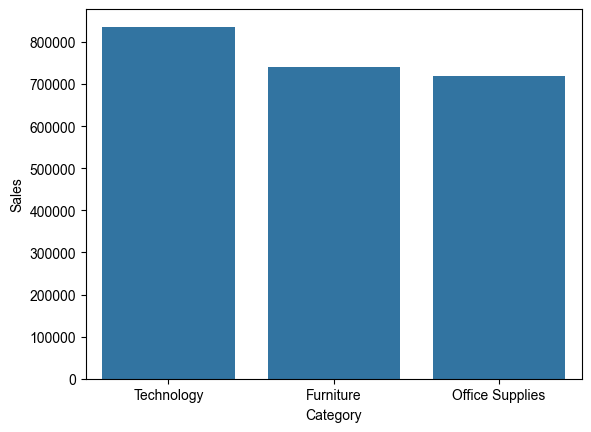

In [20]:
#sales from each segment
a=df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending =False).head()
sns.barplot(x='Category', y='Sales',data=a)
sns.set(rc={'figure.figsize':(6,5)})

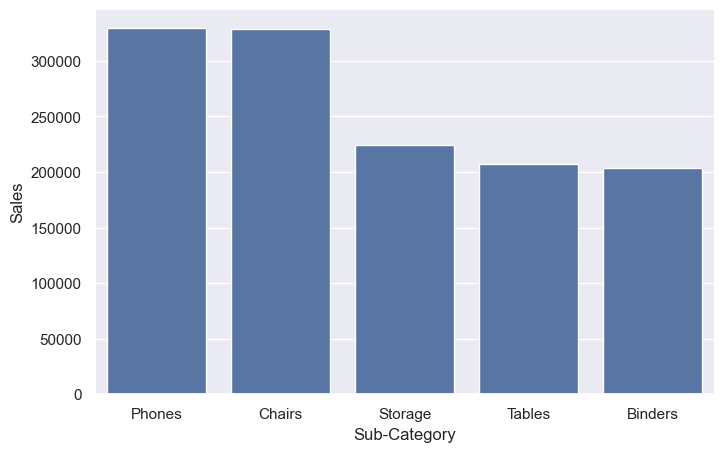

In [76]:
a=df.groupby(['Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending =False).head()
sns.barplot(x='Sub-Category', y='Sales',data=a)
sns.set(rc={'figure.figsize':(8,5)})

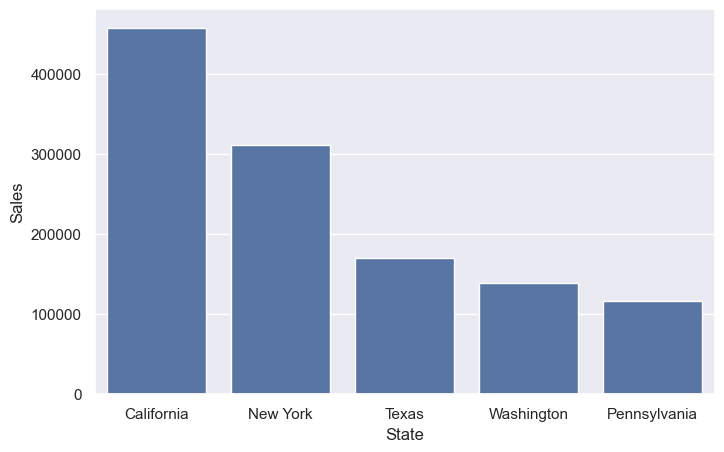

In [77]:
a=df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending =False).head()
sns.barplot(x='State', y='Sales',data=a)
sns.set(rc={'figure.figsize':(8,5)})

Text(0, 0.5, 'Total Sales')

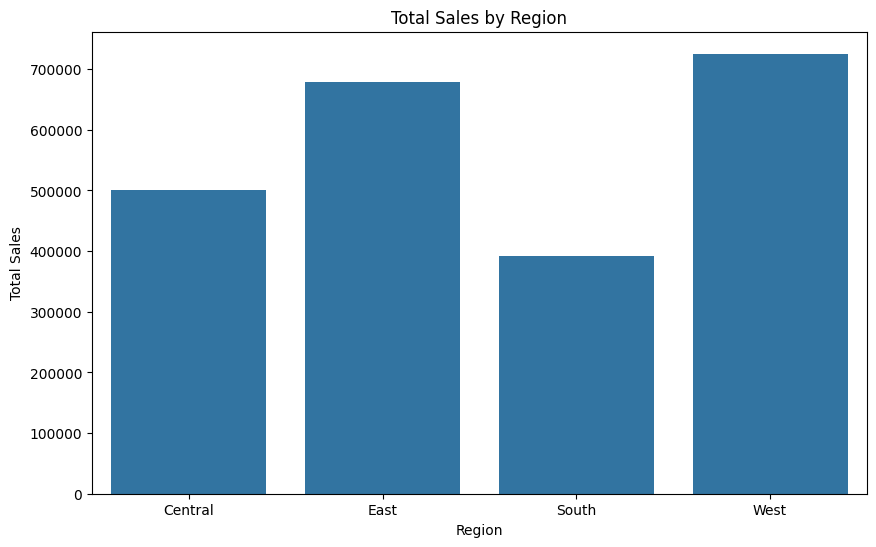

In [5]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')